<a href="https://colab.research.google.com/github/litAardvark/CSE151A_Group_Project_SII25/blob/main/CSE151A_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract
Abstract (Work in progress):

Flight delays are a costly and frustrating inevitability for even the savviest of flyers. Itineraries that accurately account for delays stand to ease a major pain point for travelers on commercial airlines. Our project seeks to address this problem by predicting the length of flight delays using machine learning. To this end, we propose the use of a supervised Support Vector Regression model. Our proposed dataset contains flight data from 2009 to 2019, gathered from the US Department of Transportation's Bureau of Transportation Statistics. We plan to implement a machine learning pipeline for training and testing. The output of our final model will enable us to identify the variables associated with longer delays.

# Datasets

**Dataset #1**: Airline Delay Analysis - contains relevant information about most US flights for a period of ten years beginning in 2009 and ending in 2019.

Link: https://www.kaggle.com/datasets/sherrytp/airline-delay-analysis

Location: /content/airline_delay_analysis


# Team

Jason Bulux
jbulux@ucsd.edu

Rosario Ortiz
mdortiz@ucsd.edu

Kwadwo Danquah
kdanquah@ucsd.edu

Sam Kogan
skogan@ucsd.edu

# Setup

[README](https://github.com/litAardvark/CSE151A_Group_Project_SII25/blob/main/README.md)

Mounted G drive to be able to use kaggle API key to download and unzip the dataset into the session.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


kaggle API key saved on Google Drive at the path:
MyDrive/Colab Notebooks

In [ ]:
!mkdir ~/.kaggle
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Download dataset from kaggle.

In [ ]:
!kaggle datasets download -d sherrytp/airline-delay-analysis

Dataset URL: https://www.kaggle.com/datasets/sherrytp/airline-delay-analysis
License(s): DbCL-1.0
airline-delay-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


Unzip it into the session.

In [ ]:
!unzip airline-delay-analysis.zip

Archive:  airline-delay-analysis.zip
replace airline delay analysis/20.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**DATA EXPLORATION**

Check for empty cells and duplicated rows in the dataset.

In [8]:
import pandas as pd

total_empty_cells = 0
duplicates = 0

print("checking dataset for missing and duplicated data")
filepath = '/content/airline delay analysis'

# The chosen csv files will be combined into one df
concatenated_df = pd.DataFrame()

for d in range(2018, 2019): #The loop excludes the endpoint
  print("checking ", d)
  df = pd.read_csv(f'{filepath}/{d}.csv')
# Drop empty columns and rows
  df = df.dropna(axis=1, how='all')
  df = df.dropna(axis=0, how='all')
# Check remaining columns for empty cells
  empty_cells = df.isnull().sum()
  concatenated_df = pd.concat([concatenated_df, df])
  #print(empty_cells)
  total_empty_cells += empty_cells.sum()
  duplicates += df.duplicated().sum()

print("total empty cells:", total_empty_cells)
print("duplicates:", duplicates)
print("total rows:", len(concatenated_df))
print("total columns:", len(concatenated_df.columns))
print("columns:", concatenated_df.columns.to_list())

checking dataset for missing and duplicated data
checking  2018
total empty cells: 37625423
duplicates: 0
total rows: 7213446
total columns: 27
columns: ['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']


**ALWAYS RUN 5TH CELL AGAIN BEFORE RUNNING EITHER OF THE CELLS BELOW**

Re-run 5th cell before running the cell below.

In [10]:
#Checking dataset info if target = ARR_DELAY

# Define the columns to scan
selected_columns = ['FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_DELAY', 'DISTANCE', 'CRS_ELAPSED_TIME', 'ARR_DELAY']
# Filter out rows where 'CANCELLED' is 0
concatenated_df = concatenated_df[concatenated_df['CANCELLED'] != 1]
concatenated_df = concatenated_df[concatenated_df['DIVERTED'] != 1]
concatenated_df.drop(columns=['CANCELLED'], inplace=True)
concatenated_df.drop(columns=['DIVERTED'], inplace=True)
# Select only the specified columns
feature_df = concatenated_df[selected_columns]
target_df = concatenated_df['ARR_DELAY']

print("features:", feature_df.columns.to_list())
print("feature shape:", feature_df.shape)
#print("target shape:", target_df.shape)

features: ['FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_DELAY', 'DISTANCE', 'CRS_ELAPSED_TIME', 'ARR_DELAY']
feature shape: (7079005, 9)


##Exploratory Data Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = feature_df.select_dtypes(include=["number"]).columns
sns.heatmap(feature_df[numerical_cols],
            annot=True,
            linewidth=.5,
            cmap = sns.color_palette("magma", as_cmap=True))

In [ ]:
sns.barplot(feature_df, x="OP_CARRIER", y="ARR_DELAY")
sns.barplot(feature_df, x="DEST", y="ARR_DELAY")
sns.barplot(feature_df, x="ORIGIN", Y="ARR_DELAY")

In [ ]:
pp = sns.pairplot(df_2018_select, hue="OP_CARRIER")

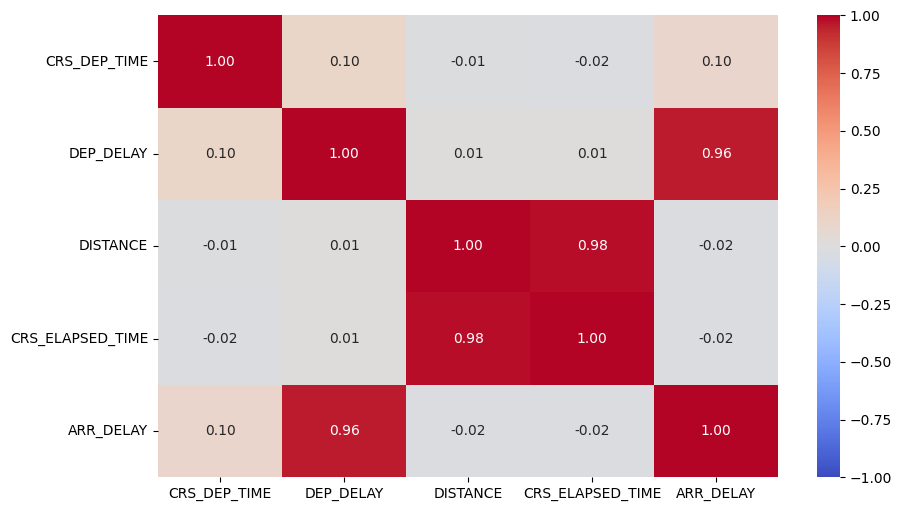

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# select features
features = ['CRS_DEP_TIME', 'DEP_DELAY', 'DISTANCE', 'CRS_ELAPSED_TIME']
df_corr = pd.concat([concatenated_df[features].copy(), target_df], axis = 1)


# compute corr matrix
corr = df_corr.corr()

# plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, vmin = -1, vmax = 1, cmap="coolwarm", fmt=".2f")
plt.show()